In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mpl.rcParams['figure.dpi'] = 150

### Read in the data

In [2]:
# Read in the data
anime_list = pd.read_csv('anime.csv')
rating_list = pd.read_csv('rating.csv')

### Explore a little bit

In [3]:
anime_list.info()
rating_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [4]:
uid = 20020
# Get the user's ratings sorted by highest rated, then get names of the top 10
rating_list[rating_list.user_id == uid].sort_values('rating', ascending=False).head(10).merge(anime_list, on='anime_id')

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,20020,226,10,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
1,20020,5060,10,Hetalia Axis Powers,"Comedy, Historical, Parody",ONA,52,7.76,144898
2,20020,5681,10,Summer Wars,"Comedy, Sci-Fi",Movie,1,8.30,223359
3,20020,3588,10,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184
4,20020,8074,9,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
5,20020,6880,9,Deadman Wonderland,"Action, Horror, Sci-Fi",TV,12,7.48,453454
6,20020,6746,9,Durarara!!,"Action, Mystery, Supernatural",TV,24,8.38,556431
7,20020,4898,9,Kuroshitsuji,"Action, Comedy, Demons, Fantasy, Historical, S...",TV,24,8.06,424919
8,20020,2993,9,Rosario to Vampire,"Comedy, Ecchi, Fantasy, Harem, Romance, School...",TV,13,7.14,299278
9,20020,1887,9,Lucky☆Star,"Comedy, Parody, School, Slice of Life",TV,24,7.87,305837


In [5]:
# For each user, get the number of ratings they have given and the average rating excluding ratings of -1
mean_ratings = rating_list[rating_list.rating != -1].groupby('user_id').agg({'rating': ['count', 'mean']})
mean_ratings.columns = ['num_ratings', 'avg_rating']
# Get mean rating when the user has rated only 1 anime
mean_ratings[mean_ratings.num_ratings == 1].describe()
# Get mean rating when the user has rated more than 100 anime
mean_ratings[mean_ratings.num_ratings > 100].describe()

,num_ratings,avg_rating
count,19798.000000,19798.000000
mean,239.817709,7.791710
std,178.616365,0.761083
min,101.000000,1.184300
25%,133.000000,7.341799
50%,182.000000,7.796460
75%,278.000000,8.255034
max,3747.000000,10.000000


In [6]:
# Average number of anime rated by users
rating_list.groupby('user_id').count().describe()

,anime_id,rating
count,73515.000000,73515.000000
mean,106.287656,106.287656
std,153.086558,153.086558
min,1.000000,1.000000
25%,18.000000,18.000000
50%,57.000000,57.000000
75%,136.000000,136.000000
max,10227.000000,10227.000000


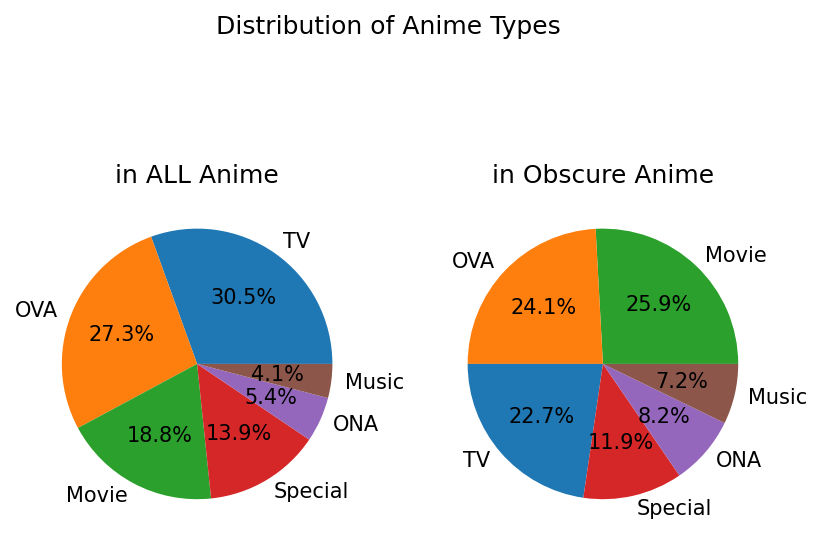

In [7]:
# Drop all un-watched/un-rated anime :(
anime_list.dropna(inplace=True)
# How many obscure anime are there?
anime_list.members.median() # ~ 1500 members
anime_list[anime_list.members < anime_list.members.median()] # ~ 6000 anime

# What is the distribution of types in ALL anime?
type_dist_general =anime_list.type.value_counts(normalize=True)*100
# Of the obscure, what is the distribution of types (in percent)?
type_dist_obscure = anime_list[anime_list.members < 1000].type.value_counts(normalize=True)*100
# Map colors in mcolors.TABLEAU_COLORS to the types of anime
colors = {}
for label, color in zip(type_dist_general.keys(), mcolors.TABLEAU_COLORS):
    colors[label] = color


fig, axs = plt.subplots(1, 2)
fig.suptitle('Distribution of Anime Types')
axs[0].pie(type_dist_general, labels=type_dist_general.keys(), autopct='%1.1f%%', colors=[colors[label] for label in type_dist_general.keys()])
axs[0].set_title('in ALL Anime')
axs[1].pie(type_dist_obscure, labels=type_dist_obscure.keys(), autopct='%1.1f%%', colors=[colors[label] for label in type_dist_obscure.keys()])
axs[1].set_title('in Obscure Anime')
plt.show()